# Práctica 3 

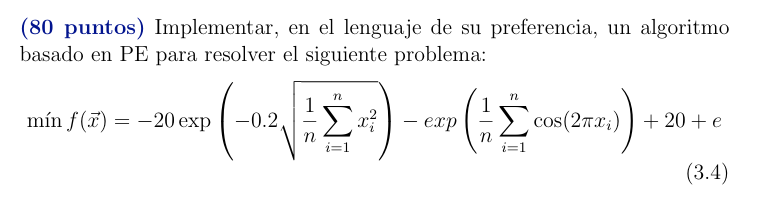
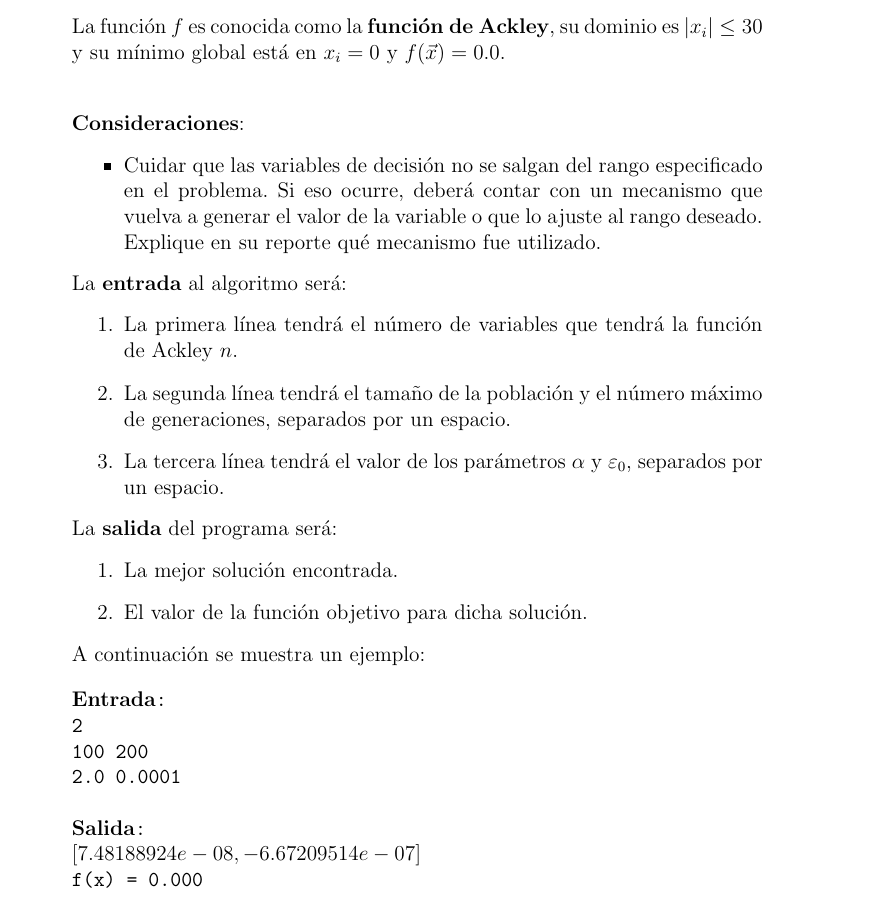

In [12]:
import numpy as np
import matplotlib.pyplot as plt

Definimos la Función de Ackley con la fórmula proporcionada anteriormente.

* x: vector de dimensiones n.

Retorna un valor escalar que mide “qué tan lejos” está x del mínimo (0).

In [4]:
def Ackley(x: np.ndarray):
    n = len(x)
    term1 = -20 * np.exp(-0.2 * np.sqrt(np.sum(x**2) / n))
    term2 = -np.exp(np.sum(np.cos(2 * np.pi * x)) / n)
    return term1 + term2 + 20 + np.e

 Definimos get_ini_pop que genera la población inicial de tamaño (size).

inf, sup: vectores con límites inferiores y superiores para cada variable.

Cada individuo es la tupla (x, σ, f(x)) donde:

x: vector aleatorio en [inf, sup].

sigma : vector de pasos de mutación en (0,1).

f(x): evaluación de Ackley.

In [5]:
def get_ini_pop(size: int, inf: np.ndarray, sup: np.ndarray, f):
    pop = []
    for _ in range(size):
        x     = np.random.uniform(inf, sup)
        sigma = np.random.uniform(0.0, 1.0, size=inf.shape)
        pop.append((x, sigma, f(x)))
    return pop

Definimos la operación de mutacion con auto‑adaptación.
Se recortan ambos (np.clip) para no salirse de [inf, sup]

In [6]:
def mutacion(ind: tuple, alpha: float, eps0: float, inf: np.ndarray, sup: np.ndarray):
    x, sigma, _ = ind
    N = len(sigma)
    sigmap = np.abs(sigma * (1 + alpha * np.random.randn(N)))
    sigmap = np.clip(sigmap, a_min=eps0, a_max=None)
    xp = x + sigmap * np.random.randn(N)
    xp = np.clip(xp, inf, sup)
    return xp, sigmap


Definimos PE Algoritmo (μ + μ) de Programación Evolutiva.

Inicializamos con pop de μ padres.

Bucle de generaciones (G iteraciones):

Para cada padre, generamos un hijo con mutacion.

Concatenamos padres + hijos → 2μ individuos.

Ordenamos por valor de función f(x) (de menor a mayor).

Seleccionamos los primeros μ (mejores).

Devolvemnos la tupla (x_best, σ_best, f_best) del mejor individuo final.

In [7]:
def PE(G: int, size: int, alpha: float, eps0: float,
       inf: np.ndarray, sup: np.ndarray,
       f_plot: int, f):
    pop = get_ini_pop(size, inf, sup, f)
    for i in range(G):
        new_pop = []
        for ind in pop:
            xp, sigmap = mutacion(ind, alpha, eps0, inf, sup)
            new_pop.append((xp, sigmap, f(xp)))
        pop += new_pop
        pop.sort(key=lambda x: x[2])
        pop = pop[:size]
    return pop[0]  # (x_best, sigma_best, f_best)

In [10]:
if __name__ == "__main__":
    # Lectura de parámetros 
    n        = int(input().strip())               # dimensión
    mu, G    = map(int, input().split())          # población , generaciones G
    alpha, eps0 = map(float, input().split())    
    inf = np.array([-30.0] * n)
    sup = np.array([ 30.0] * n)

    # Una sola ejecución
    x_best, sigma_best, f_best = PE(G, mu, alpha, eps0, inf, sup, 0, Ackley)
    print("Mejor solución encontrada:")
    print(x_best)
    print(f"f(x) = {f_best:.6f}")



Mejor solución encontrada:
[-9.95275853e-01  7.96167391e+00 -2.81089095e-04  1.99057889e+00
 -9.94993040e-01]
f(x) = 10.520018


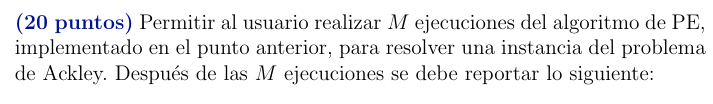
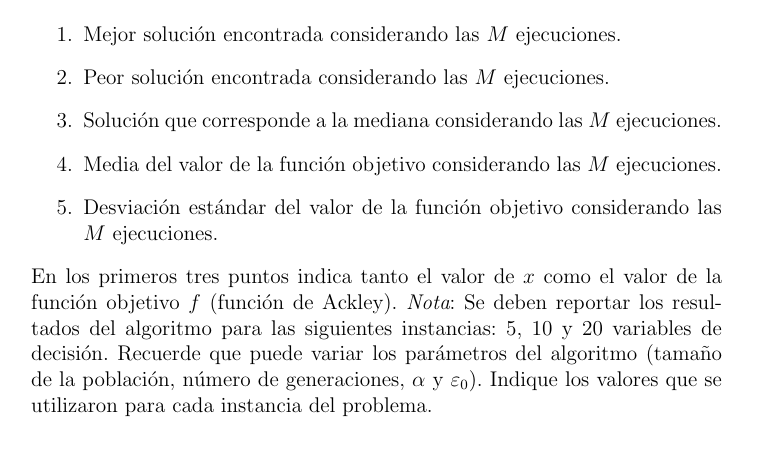

In [ ]:
if __name__ == "__main__":
    # Leémos de nuevo los parametros
    n        = int(input().strip())
    mu, G    = map(int, input().split())
    alpha, eps0 = map(float, input().split())
    inf = np.array([-30.0] * n)
    sup = np.array([ 30.0] * n)

    # Leémos las (M) número de ejecuciones
    M = int(input().strip())

    # Ejecutamos PE M veces y guardamos (x, f) de cada corrida
    soluciones = []
    for _ in range(M):
        xb, sb, fb = PE(G, mu, alpha, eps0, inf, sup, 0, Ackley)
        soluciones.append((xb, fb))

    # Extraemos solo los valores f para estadística
    f_vals = np.array([fb for _, fb in soluciones])

    # Ordenamos índices según f (de menor a mayor)
    idx = np.argsort(f_vals)

    # Identificamos soluciones:
    best   = soluciones[idx[0]]        # mínima f
    maxima  = soluciones[idx[-1]]       # máxima f
    median = soluciones[idx[M // 2]]   # f en posición mediana

    # Imprimimos los resultados
    print("Mejor corrida:")
    print(best[0], f"{best[1]:.6f}")

    print("Peor corrida:")
    print(maxima[0], f"{maxima[1]:.6f}")

    print("Mediana corrida:")
    print(median[0], f"{median[1]:.6f}")

    # Calculamos media y desviación
    print("Media de f:", f"{np.mean(f_vals):.6f}")
    print("Desvío estándar de f:", f"{np.std(f_vals):.6f}")
    #Para los parametros :
    # 5
    # 100 200
    #   0.5 0.001
    # 5

Mejor corrida:
[ 1.06708196e-04 -2.04184457e-04 -3.34889163e-05 -5.88346545e-05
 -1.16446387e-04] 0.000478
Peor corrida:
[ 9.91901839e-01  8.32317046e-05 -9.91972271e-01 -4.95814068e+00
  2.97536078e+00] 8.280163
Mediana corrida:
[9.71897683e-01 9.71754436e-01 1.00922864e-04 1.88359396e-04
 1.94239252e+00] 3.885760
Media de f: 3.958123
Desvío estándar de f: 2.958815


In [14]:
if __name__ == "__main__":
    # Leémos de nuevo los parametros
    n        = int(input().strip())
    mu, G    = map(int, input().split())
    alpha, eps0 = map(float, input().split())
    inf = np.array([-30.0] * n)
    sup = np.array([ 30.0] * n)

    # Leémos las (M) número de ejecuciones
    M = int(input().strip())

    # Ejecutamos PE M veces y guardamos (x, f) de cada corrida
    soluciones = []
    for _ in range(M):
        xb, sb, fb = PE(G, mu, alpha, eps0, inf, sup, 0, Ackley)
        soluciones.append((xb, fb))

    # Extraemos solo los valores f para estadística
    f_vals = np.array([fb for _, fb in soluciones])

    # Ordenamos índices según f (de menor a mayor)
    idx = np.argsort(f_vals)

    # Identificamos soluciones:
    best   = soluciones[idx[0]]        # mínima f
    maxima  = soluciones[idx[-1]]       # máxima f
    median = soluciones[idx[M // 2]]   # f en posición mediana

    # Imprimimos los resultados
    print("Mejor corrida:")
    print(best[0], f"{best[1]:.6f}")

    print("Peor corrida:")
    print(maxima[0], f"{maxima[1]:.6f}")

    print("Mediana corrida:")
    print(median[0], f"{median[1]:.6f}")

    # Calculamos media y desviación
    print("Media de f:", f"{np.mean(f_vals):.6f}")
    print("Desvío estándar de f:", f"{np.std(f_vals):.6f}")
    #Para los parametros :
    # 10
    # 100 200
    # 0.5 0.001
    # 10


Mejor corrida:
[-2.9762784  -0.99159238  0.98438926 -3.95634478 -0.9834201   0.98985548
 -0.97884788 -1.00445481 -3.93439855 -0.99006522] 7.069024
Peor corrida:
[-9.98834477e-01 -7.78967338e-05  4.99788309e+00  2.59868959e+01
 -9.98069560e-01 -5.99691759e+00  1.49917898e+01 -4.99765298e+00
  9.98505022e-01  2.99803290e+00] 17.289238
Mediana corrida:
[-9.96627820e-01 -9.97446590e-01  2.29351750e-03 -1.99497989e+00
  1.29608463e+01 -4.51394353e-04 -2.99297737e+00  4.98152749e+00
  3.98838160e+00 -2.99016733e+00] 12.388413
Media de f: 11.940785
Desvío estándar de f: 3.560795


In [ ]:
if __name__ == "__main__":
    # Leémos de nuevo los parametros
    n        = int(input().strip())
    mu, G    = map(int, input().split())
    alpha, eps0 = map(float, input().split())
    inf = np.array([-30.0] * n)
    sup = np.array([ 30.0] * n)

    # Leémos las (M) número de ejecuciones
    M = int(input().strip())

    # Ejecutamos PE M veces y guardamos (x, f) de cada corrida
    soluciones = []
    for _ in range(M):
        xb, sb, fb = PE(G, mu, alpha, eps0, inf, sup, 0, Ackley)
        soluciones.append((xb, fb))

    # Extraemos solo los valores f para estadística
    f_vals = np.array([fb for _, fb in soluciones])

    # 5) Ordenamos índices según f (de menor a mayor)
    idx = np.argsort(f_vals)

    # Identificamos soluciones: 
    best   = soluciones[idx[0]]        # mínima f
    maxima  = soluciones[idx[-1]]       # máxima f
    median = soluciones[idx[M // 2]]   # f en posición mediana

    # Imprimimos los resultados
    print("Mejor corrida:")
    print(best[0], f"{best[1]:.6f}")

    print("Peor corrida:")
    print(maxima[0], f"{maxima[1]:.6f}")

    print("Mediana corrida:")
    print(median[0], f"{median[1]:.6f}")

    # Calculamos media y desviación
    print("Media de f:", f"{np.mean(f_vals):.6f}")
    print("Desvío estándar de f:", f"{np.std(f_vals):.6f}")
    #Para los parametros :
    # 20
    # 100 200
    #   0.5 0.001
    # 20

Mejor corrida:
[-1.97503676 -0.95534016  2.93094941 -1.92333586  6.10000744  1.03769774
 -0.08776989  4.01928494  3.18179091  0.0403246  -5.99068427  0.97787192
 -1.04429039  2.94061981  1.07573484  0.05462627  9.69203601 -3.08247451
  6.05851993 -4.97244312] 11.104664
Peor corrida:
[ -4.99130867 -20.99602499 -20.00384412  -3.99519288  -7.00512634
   6.99244204  17.99738644  -3.99914938  14.9950908    5.99519432
   0.99478373   8.00684361 -16.99673019  -1.00550888   7.99185412
  -5.9988193    9.99744705  -1.00091213  10.00176853  23.00132589] 18.097240
Mediana corrida:
[ -9.98257472   6.99058008   3.98438619   0.98560918  -1.98164353
   3.98717591  10.00059932  -2.00375941  -3.01016024   1.02293326
  20.98010777  -5.9770638    7.99508231  14.99156502  -3.00604783
 -20.96326768  -4.9777056   -4.98193199   2.97969067  13.98485346] 16.962586
Media de f: 16.251334
Desvío estándar de f: 1.749638
